In [1]:
# Put these at the top of every notebook, to get automatic reloading and inline plotting
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
# This file contains all the main external libs we'll use
from fastai.imports import *

In [3]:
from fastai.transforms import *
from fastai.conv_learner import *
from fastai.model import *
from fastai.dataset import *
from fastai.sgdr import *
from fastai.plots import *

In [4]:
PATH = "data/seedlings/"
sz=224

In [5]:
from create_validation_set import create_validation_set

In [13]:
arch=resnet34
data = ImageClassifierData.from_paths(PATH, tfms=tfms_from_model(arch, sz))
learn = ConvLearner.pretrained(arch, data, precompute=True)
learn.fit(0.01, 10)

HBox(children=(IntProgress(value=0, description='Epoch', max=10), HTML(value='')))

epoch      trn_loss   val_loss   accuracy                 
    0      1.518794   0.879056   0.736152  
    1      1.079252   0.747018   0.774694                 
    2      0.85771    0.616173   0.795527                  
    3      0.745789   0.562294   0.815339                  
    4      0.651628   0.643905   0.8096                    
    5      0.613693   0.53784    0.816115                  
    6      0.565109   0.626103   0.814808                  
    7      0.549316   0.556128   0.816381                  
    8      0.520391   0.57165    0.820282                  
    9      0.499286   0.555895   0.818199                  



[0.55589503, 0.81819852987925212]

In [14]:
learn = ConvLearner.pretrained(arch, data, precompute=True)

In [15]:
lrf=learn.lr_find()

HBox(children=(IntProgress(value=0, description='Epoch', max=1), HTML(value='')))

 65%|██████▌   | 39/60 [00:00<00:00, 55.36it/s, loss=16]  


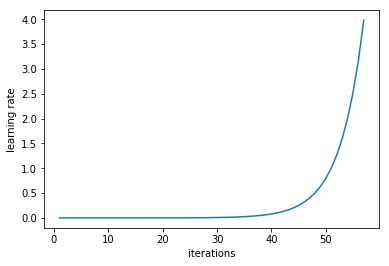

In [16]:
learn.sched.plot_lr()

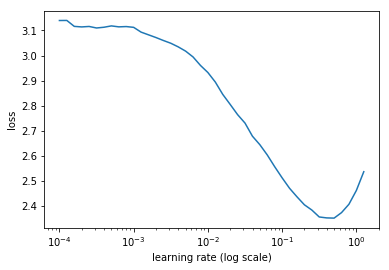

In [18]:
learn.sched.plot()

In [13]:
fn_list = []
fn_list.append(transforms_side_on)
fn_list.append(transforms_top_down)
# TODO: why isn't passing multiple functions working?
tfms = tfms_from_model(resnet34, sz, aug_tfms=transforms_top_down, max_zoom=1.1)

In [14]:
arch=resnet34

In [15]:
def get_augs():
    data = ImageClassifierData.from_paths(PATH, bs=2, tfms=tfms, num_workers=1)
    x,_ = next(iter(data.aug_dl))
    return data.trn_ds.denorm(x)[1]

In [16]:
ims = np.stack([get_augs() for i in range(6)])

In [30]:
data = ImageClassifierData.from_paths(PATH, tfms=tfms, test_name='test')
learn = ConvLearner.pretrained(arch, data, ps=0.5, precompute=True)

In [34]:
learn.precompute=False

In [31]:
learn.fit(.01, 3, cycle_len=1)

HBox(children=(IntProgress(value=0, description='Epoch', max=3), HTML(value='')))

epoch      trn_loss   val_loss   accuracy                 
    0      1.885165   1.369423   0.557496  
    1      1.483358   1.043461   0.670507                 
    2      1.232898   0.909903   0.723386                 



[0.90990335, 0.72338643868764241]

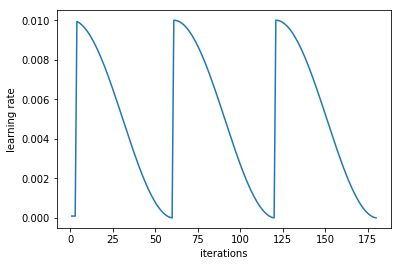

In [23]:
learn.sched.plot_lr()

In [24]:
learn.save('311_dropout')

In [30]:
learn.load('224_lastlayer')

In [31]:
learn.unfreeze()

In [32]:
lr=np.array([1e-4,1e-3,1e-2])

In [35]:
learn.fit(lr, 4, cycle_len=1, cycle_mult=2)

HBox(children=(IntProgress(value=0, description='Epoch', max=15), HTML(value='')))

epoch      trn_loss   val_loss   accuracy                 
    0      1.16837    0.772778   0.763235  
    1      1.092205   0.72876    0.771834                 
    2      1.031302   0.712093   0.77261                  
    3      1.001616   0.649605   0.788235                  
    4      0.965732   0.613422   0.781985                  
    5      0.929275   0.598129   0.79761                   
    6      0.885874   0.597852   0.800225                  
    7      0.90311    0.581211   0.810641                  
    8      0.894907   0.56694    0.814808                  
    9      0.880913   0.57149    0.808558                  
    10     0.867962   0.551001   0.814808                  
    11     0.844958   0.546276   0.824183                  
    12     0.811553   0.53482    0.825225                  
    13     0.804432   0.529622   0.825225                  
    14     0.798321   0.525235   0.825225                  



[0.52523488, 0.82522467374801634]

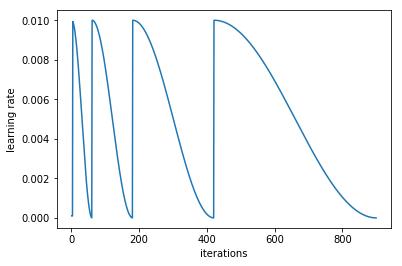

In [28]:
learn.sched.plot_lr()

In [29]:
learn.save('311_dropout_unfrozen')

In [35]:
log_preds,y = learn.TTA()
probs = np.mean(np.exp(log_preds),0)

In [36]:
accuracy_np(probs, y)

0.96198521647307289

In [37]:
learn.save('224_lastlayer')

In [41]:
learn.predict(is_test=True)

array([[ -5.71791,  -8.31688, -12.62072, ..., -15.84714, -14.44636,  -7.51565],
       [-21.2025 , -16.00122, -17.13152, ..., -15.57726,   0.     , -25.92457],
       [-18.60442, -16.75666, -18.14643, ..., -14.75716,   0.     , -23.54968],
       ..., 
       [ -9.19987, -10.29324, -13.90848, ..., -16.52541, -12.87337,  -5.11689],
       [-18.75389, -17.9455 , -14.51796, ..., -11.01674, -16.32865, -10.83879],
       [-10.57996, -11.19645,  -7.47016, ..., -13.1468 , -10.54759,  -1.805  ]], dtype=float32)

In [42]:
log_preds,y = learn.TTA()

In [45]:
log_preds

array([[[ -0.10922,  -8.06589, -12.61468, ..., -10.94263, -15.09948,  -7.48787],
        [ -0.42251, -10.10537, -14.53015, ..., -10.30175, -14.34242,  -5.46777],
        [ -0.17463, -17.08064, -17.06659, ..., -18.38884, -14.43776, -16.78298],
        ..., 
        [-17.64027, -17.18641, -20.67473, ..., -21.92278, -20.09779,  -0.     ],
        [-19.67255, -21.57103, -19.5388 , ..., -22.83472, -25.57581,  -0.     ],
        [-12.80501,  -9.02093,  -5.20657, ..., -11.96661, -11.09927,  -0.01252]],

       [[ -0.1543 , -10.55686, -11.3549 , ..., -11.72953, -15.05464,  -9.68756],
        [ -0.06524, -12.78402, -15.19149, ..., -13.77655, -14.88787,  -7.58188],
        [ -0.26854, -16.6468 , -17.5272 , ..., -18.26332, -13.81885, -18.21991],
        ..., 
        [-18.40952, -16.05696, -19.50155, ..., -20.14129, -17.65852,  -0.00004],
        [-21.70254, -21.94869, -25.46514, ..., -24.14139, -26.7204 ,  -0.     ],
        [-14.0851 ,  -8.95573,  -6.71335, ..., -12.28298, -12.18348,  -0.00644]

In [46]:
preds = np.mean(log_preds, 0)

In [62]:
probs = np.mean(np.exp(log_preds), axis=0)

In [63]:
probs

array([[ 0.89147,  0.0001 ,  0.00001, ...,  0.00001,  0.     ,  0.00018],
       [ 0.85696,  0.00002,  0.     , ...,  0.00001,  0.00002,  0.00111],
       [ 0.76043,  0.     ,  0.     , ...,  0.     ,  0.     ,  0.     ],
       ..., 
       [ 0.     ,  0.     ,  0.     , ...,  0.     ,  0.     ,  0.99996],
       [ 0.     ,  0.     ,  0.     , ...,  0.     ,  0.     ,  1.     ],
       [ 0.     ,  0.00015,  0.00243, ...,  0.     ,  0.00001,  0.9921 ]], dtype=float32)

In [69]:
probs.argmax(axis=1)

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  6,  0,  0,  0,  0,  0,  0,  0,  0,  6,  6,
        0,  6,  0,  7,  0,  6,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  6,  6,  0,  6,  6,  6,  6,  6,  0,  6,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, 11,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,
        3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,
 